In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(37) # 使得每次运行得到的随机数都一样

In [2]:
# 准备数据集
data_path='E:\PyProjects\DataSet\FireAI/data_multivar.txt'
df=pd.read_csv(data_path,header=None)
# print(df.head())
# print(df.info()) # 查看数据信息，确保没有错误
dataset_X,dataset_y=df.iloc[:,:-1],df.iloc[:,-1]
# print(dataset_X.head())
print(dataset_X.info())
print('-'*100)
# print(dataset_y.head())
dataset_X=dataset_X.values  # 此处是无监督学习，故而不需要标记
# dataset_y=dataset_y.values # 此处是没有标记，故而相当于没有dataset_y
# print(dataset_X.shape) # (400, 2)
# print(dataset_y.shape) # (400,)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
0    400 non-null float64
1    400 non-null float64
dtypes: float64(2)
memory usage: 6.3 KB
None
----------------------------------------------------------------------------------------------------


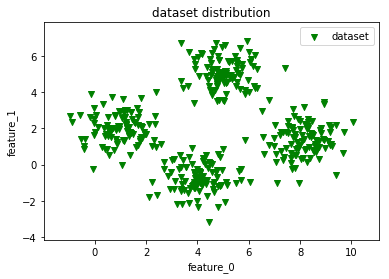

In [3]:
# 无标签数据集可视化，将第一列feature作为X，第二列feature作为y
def visual_2D_dataset_dist(dataset):
    '''将二维数据集dataset显示在散点图中'''
    assert dataset.shape[1]==2,'only support dataset with 2 features'
    plt.figure()
    X=dataset[:,0]
    Y=dataset[:,1]
    plt.scatter(X,Y,marker='v',c='g',label='dataset')
    
    X_min,X_max=np.min(X)-1,np.max(X)+1
    Y_min,Y_max=np.min(Y)-1,np.max(Y)+1
    plt.title('dataset distribution')
    plt.xlim(X_min,X_max)
    plt.ylim(Y_min,Y_max)
    plt.xlabel('feature_0')
    plt.ylabel('feature_1')
    plt.legend()
    
visual_2D_dataset_dist(dataset_X)
# 这部分和FireAI_021文章中的代码一样

In [4]:
# 构建MeanShift对象，但需要评估带宽
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth=estimate_bandwidth(dataset_X,quantile=0.1,
                             n_samples=len(dataset_X))
meanshift=MeanShift(bandwidth=bandwidth,bin_seeding=True) # 构建对象
meanshift.fit(dataset_X) # 并用MeanShift对象来训练该数据集

centroids=meanshift.cluster_centers_ # 质心的坐标，对应于feature0, feature1
print(centroids) # 可以看出有4行，即4个质心
labels=meanshift.labels_  # 数据集中每个数据点对应的label
# print(labels) 

cluster_num=len(np.unique(labels)) # label的个数，即自动划分的族群的个数
print('cluster num: {}'.format(cluster_num))

[[ 8.22338235  1.34779412]
 [ 4.10104478 -0.81164179]
 [ 1.18820896  2.10716418]
 [ 4.995       4.99967742]]
cluster num: 4


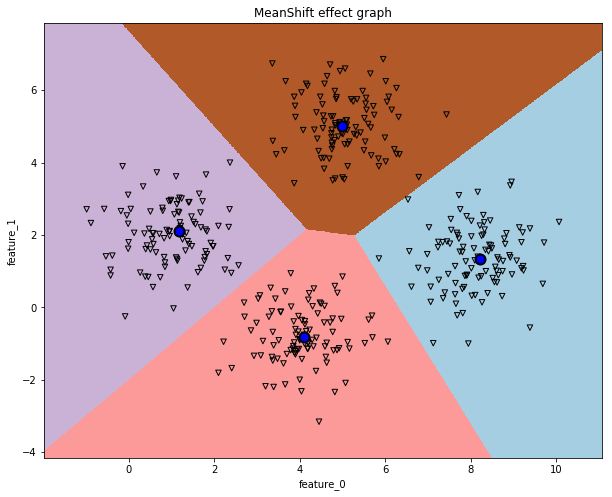

In [5]:
def visual_meanshift_effect(meanshift,dataset):
    assert dataset.shape[1]==2,'only support dataset with 2 features'
    X=dataset[:,0]
    Y=dataset[:,1]
    X_min,X_max=np.min(X)-1,np.max(X)+1
    Y_min,Y_max=np.min(Y)-1,np.max(Y)+1
    X_values,Y_values=np.meshgrid(np.arange(X_min,X_max,0.01),
                                  np.arange(Y_min,Y_max,0.01))
    # 预测网格点的标记
    predict_labels=meanshift.predict(np.c_[X_values.ravel(),Y_values.ravel()])
    predict_labels=predict_labels.reshape(X_values.shape)
    plt.figure(figsize=(10,8))
    plt.imshow(predict_labels,interpolation='nearest',
               extent=(X_values.min(),X_values.max(),
                       Y_values.min(),Y_values.max()),
               cmap=plt.cm.Paired,
               aspect='auto',
               origin='lower')
    
    # 将数据集绘制到图表中
    plt.scatter(X,Y,marker='v',facecolors='none',edgecolors='k',s=30)
    
    # 将中心点绘制到图中
    centroids=meanshift.cluster_centers_
    plt.scatter(centroids[:,0],centroids[:,1],marker='o',
                s=100,linewidths=2,color='k',zorder=5,facecolors='b')
    plt.title('MeanShift effect graph')
    plt.xlim(X_min,X_max)
    plt.ylim(Y_min,Y_max)
    plt.xlabel('feature_0')
    plt.ylabel('feature_1')
    plt.show()
    
visual_meanshift_effect(meanshift,dataset_X)